  Farm_ID  Crop_Type  Farm_Area(acres) Irrigation_Type  Fertilizer_Used(tons)  \
0    F001     Cotton            329.40       Sprinkler                   8.14   
1    F002     Carrot             18.67          Manual                   4.77   
2    F003  Sugarcane            306.03           Flood                   2.91   
3    F004     Tomato            380.21        Rain-fed                   3.32   
4    F005     Tomato            135.56       Sprinkler                   8.33   

   Pesticide_Used(kg)  Yield(tons) Soil_Type  Season  Water_Usage  
0                2.21        14.44     Loamy  Kharif     76648.20  
1                4.36        42.91     Peaty  Kharif     68725.54  
2                0.56        33.44     Silty  Kharif     75538.56  
3                4.35        34.08     Silty    Zaid     45401.23  
4                4.48        43.28      Clay    Zaid     93718.69  


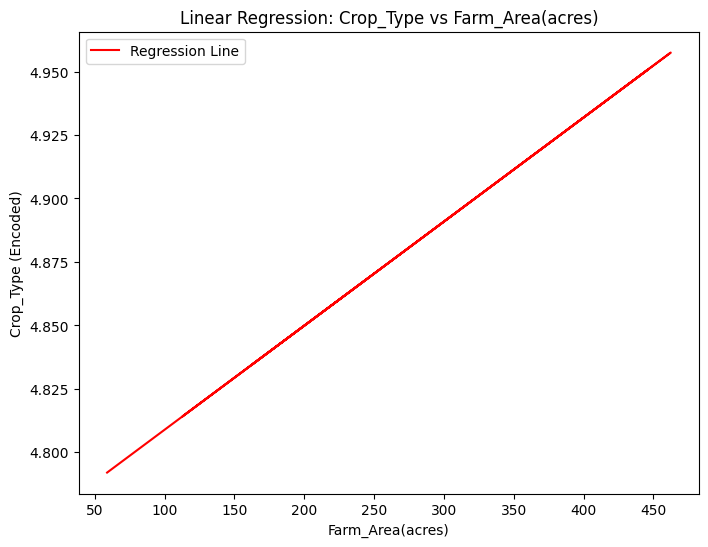

Slope: 0.0004102276728178356
Intercept: 4.767799304539243
Mean Squared Error: 14.713117431793375


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "/content/agriculture_dataset.csv"
df = pd.read_csv(file_path)
print(df.head())  # Check if df is loaded correctly

# Selecting relevant columns
df = df[['Farm_Area(acres)', 'Crop_Type']].dropna()

# Encode categorical target variable
label_encoder = LabelEncoder()
df['Crop_Type'] = label_encoder.fit_transform(df['Crop_Type'])

# Splitting data into training and testing sets
X = df[['Farm_Area(acres)']]
y = df['Crop_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Plot regression line
plt.figure(figsize=(8, 6))
#sns.scatterplot(x=X_test['Farm_Area(acres)'], y=y_test, label='Actual Data', color='blue')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Farm_Area(acres)')
plt.ylabel('Crop_Type (Encoded)')
plt.title('Linear Regression: Crop_Type vs Farm_Area(acres)')
plt.legend()
plt.show()

# Print model coefficients
print(f"Slope: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
